In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from collections import Counter


In [2]:
data = pd.read_csv("C:/Users/olowe_m/OneDrive/DA Material/DS Exercise 3/MPS_cleanv1.csv")
data.head(10)
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
data.drop(columns=['Location', 'A'], axis = 1, inplace = True)
data.head(5)

,ComponentAge,MonthlyRunTime,FlowRate,MaxOutputRate,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor5.1,DaysSinceMaintenance,Target,Location A
0,0.55,9.5,0.99740,32.0,10.0,1.90,0.580,3.13,0.22,0.080,9.0,0,0
1,0.32,12.7,0.99184,28.0,6.9,10.55,0.300,3.07,0.30,0.037,4.0,0,1
2,0.57,9.7,0.99743,86.0,7.2,2.30,0.660,3.53,0.03,0.078,16.0,0,0
3,0.50,9.5,0.99593,84.0,7.1,1.80,0.755,3.19,0.15,0.107,20.0,0,0
4,0.44,10.8,0.99280,127.0,7.0,4.90,0.290,3.17,0.37,0.034,26.0,0,1


In [3]:
#Model Building

# Defining regressand(Y) and regressors(X)

from sklearn.model_selection import train_test_split
X = data.drop('Target', axis=1)
y = data['Target']

X.head()

,ComponentAge,MonthlyRunTime,FlowRate,MaxOutputRate,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor5.1,DaysSinceMaintenance,Location A
0,0.55,9.5,0.99740,32.0,10.0,1.90,0.580,3.13,0.22,0.080,9.0,0
1,0.32,12.7,0.99184,28.0,6.9,10.55,0.300,3.07,0.30,0.037,4.0,1
2,0.57,9.7,0.99743,86.0,7.2,2.30,0.660,3.53,0.03,0.078,16.0,0
3,0.50,9.5,0.99593,84.0,7.1,1.80,0.755,3.19,0.15,0.107,20.0,0
4,0.44,10.8,0.99280,127.0,7.0,4.90,0.290,3.17,0.37,0.034,26.0,1


In [4]:
# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int
data.describe()

,ComponentAge,MonthlyRunTime,FlowRate,MaxOutputRate,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor5.1,DaysSinceMaintenance,Target,Location A
count,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000
mean,0.531150,10.492825,0.994698,115.694492,7.217755,5.443958,0.339589,3.218332,0.318758,0.056056,30.516865,0.196658,0.753520
std,0.148913,1.193128,0.003001,56.526736,1.297913,4.756852,0.164639,0.160650,0.145252,0.035076,17.758815,0.397502,0.430995
min,0.220000,8.000000,0.987110,6.000000,3.800000,0.600000,0.080000,2.720000,0.000000,0.009000,1.000000,0.000000,0.000000
25%,0.430000,9.500000,0.992330,77.000000,6.400000,1.800000,0.230000,3.110000,0.250000,0.038000,17.000000,0.000000,1.000000
50%,0.510000,10.300000,0.994890,118.000000,7.000000,3.000000,0.290000,3.210000,0.310000,0.047000,29.000000,0.000000,1.000000
75%,0.600000,11.300000,0.997000,156.000000,7.700000,8.100000,0.400000,3.320000,0.390000,0.065000,41.000000,0.000000,1.000000
max,2.000000,14.900000,1.038980,440.000000,15.900000,65.800000,1.580000,4.010000,1.660000,0.611000,289.000000,1.000000,1.000000


In [5]:
from sklearn.feature_selection import mutual_info_classif

def make_mi_scores(X, Y, discrete_features):
    mi_scores = mutual_info_classif(X, Y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[1:12]

FlowRate                0.088123
Sensor2                 0.043307
Sensor5.1               0.042905
MaxOutputRate           0.040553
Sensor5                 0.022181
Sensor1                 0.018011
Sensor3                 0.017857
ComponentAge            0.015537
DaysSinceMaintenance    0.012088
Sensor4                 0.008891
Location A              0.000000
Name: MI Scores, dtype: float64

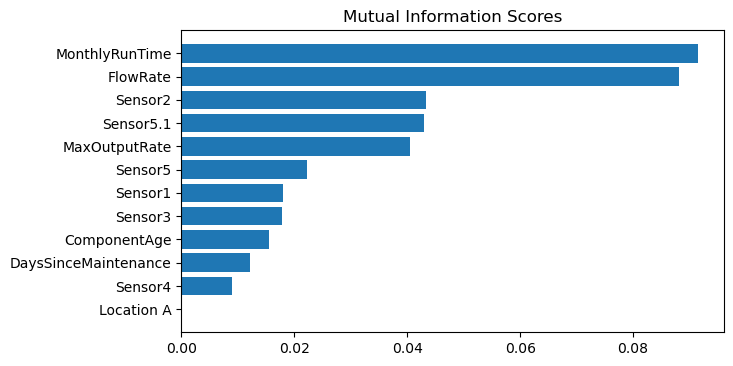

In [6]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

plt.figure(dpi=100, figsize=(7, 4))
plot_mi_scores(mi_scores)

The results suggest perhaps four of the 10 features as being important to prediction.
MonthlyRunTime	
FlowRate	
MaxOutputRate	
Sensor2	
Sensor3	
Sensor5	
Sensor5.1

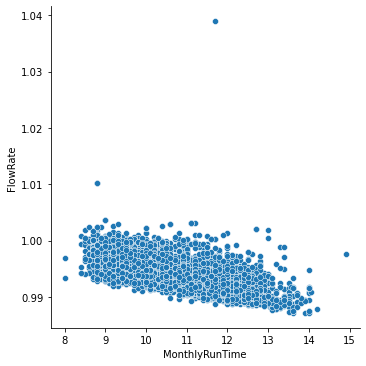

In [7]:
sns.relplot(x="MonthlyRunTime",y="FlowRate", data=data);

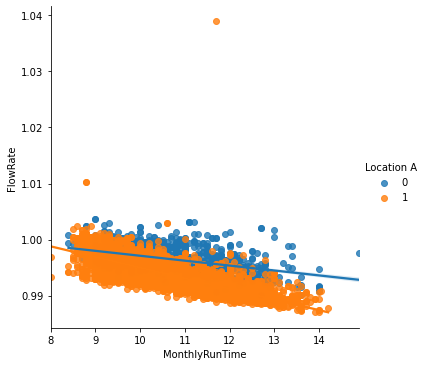

In [8]:
sns.lmplot(x="MonthlyRunTime", y="FlowRate", hue="Location A", data=data);

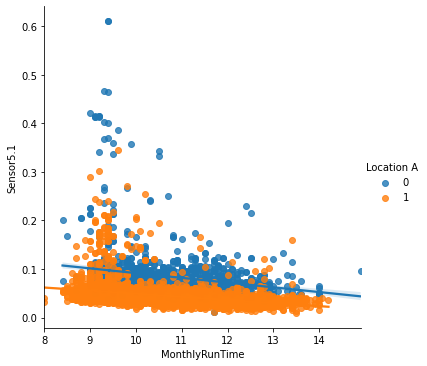

In [9]:
sns.lmplot(x="MonthlyRunTime", y="Sensor5.1", hue="Location A", data=data);

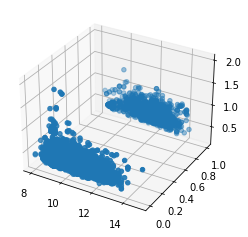

In [10]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['MonthlyRunTime'], data['Target'], data['ComponentAge'])

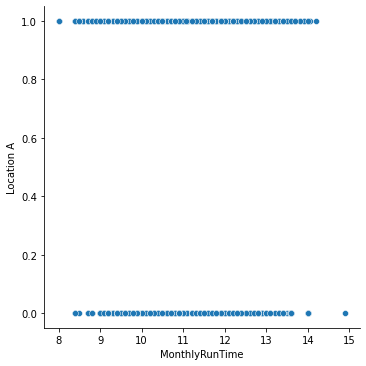

In [11]:
sns.relplot(x="MonthlyRunTime",y="Location A", data=data);

In [12]:
#Splitting the dataset for training(80%) and testing(20%)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5170, 12)
(1293, 12)
(5170,)
(1293,)


In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
base_preds = model.predict(X_test)
from sklearn.metrics import classification_report,plot_confusion_matrix
print(classification_report(y_test,base_preds))
#Calculate Feature Importance
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance']).sort_values('Feature Importance',ascending=False)
# get predicted prices on validation data using training data
print(mean_absolute_error(y_test, base_preds))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1037
           1       0.58      0.59      0.58       256

    accuracy                           0.83      1293
   macro avg       0.74      0.74      0.74      1293
weighted avg       0.83      0.83      0.83      1293

0.16550657385924208


C:\Users\olowe_m\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


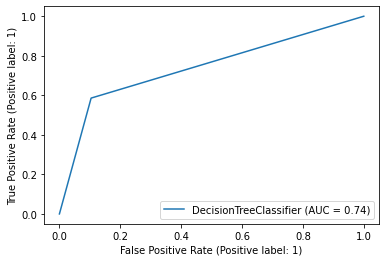

In [14]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve
plot_roc_curve(model, X_test,y_test)

UnderSample Method

In [15]:
data['Target'].value_counts()

0    5192
1    1271
Name: Target, dtype: int64

In [16]:
#class count
count_class_0, count_class_1 = data.Target.value_counts()

#divide by class
data_class_0 = data[data['Target']==0]
data_class_1 = data[data['Target']==1]

In [17]:
data_class_0.shape

(5192, 13)

In [18]:
data_class_1.shape

(1271, 13)

In [19]:
data_class_0_under = data_class_0.sample(count_class_1)

data_concate_under = pd.concat([data_class_0_under, data_class_1], axis=0)

data_concate_under['Target'].value_counts()

data_concate_under.head()

,ComponentAge,MonthlyRunTime,FlowRate,MaxOutputRate,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor5.1,DaysSinceMaintenance,Target,Location A
3400,0.35,12.00,0.99044,87.0,7.3,2.3,0.200,2.94,0.39,0.048,24.0,0,1
4485,0.48,9.50,0.99542,215.0,6.3,7.9,0.270,3.19,0.37,0.047,58.0,0,1
5667,0.44,10.15,0.99218,123.0,5.2,1.0,0.185,3.55,0.22,0.030,47.0,0,1
3953,0.75,10.20,0.99551,21.0,8.8,1.4,0.450,3.21,0.43,0.076,12.0,0,0
5431,0.50,10.60,0.99519,185.0,6.7,10.3,0.180,3.12,0.24,0.057,64.0,0,1


In [20]:
data_concate_under.describe()

,ComponentAge,MonthlyRunTime,FlowRate,MaxOutputRate,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor5.1,DaysSinceMaintenance,Target,Location A
count,2542.000000,2542.000000,2542.000000,2542.000000,2542.000000,2542.000000,2542.000000,2542.000000,2542.000000,2542.000000,2542.000000,2542.000000,2542.000000
mean,0.534555,10.833746,0.994131,114.309205,7.175020,5.319788,0.319955,3.220885,0.323344,0.051714,30.660700,0.500000,0.786389
std,0.149297,1.273794,0.003086,52.925032,1.317023,4.563954,0.148941,0.160912,0.132428,0.028815,16.399253,0.500098,0.409936
min,0.220000,8.000000,0.987110,7.000000,3.800000,0.600000,0.080000,2.740000,0.000000,0.012000,1.000000,0.000000,0.000000
25%,0.430000,9.700000,0.991600,84.000000,6.400000,1.800000,0.220000,3.110000,0.260000,0.035000,18.000000,0.000000,1.000000
50%,0.510000,10.800000,0.994000,117.000000,7.000000,3.200000,0.280000,3.210000,0.310000,0.044000,29.000000,0.500000,1.000000
75%,0.610000,11.900000,0.996567,150.000000,7.600000,7.900000,0.380000,3.330000,0.390000,0.058000,41.000000,1.000000,1.000000
max,1.620000,14.200000,1.010300,303.000000,15.600000,31.600000,1.330000,4.010000,1.000000,0.414000,108.000000,1.000000,1.000000


In [21]:
X = data_concate_under.drop('Target', axis=1)
y = data_concate_under['Target']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2033, 12)
(509, 12)
(2033,)
(509,)


In [22]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
base_preds = model.predict(X_test)
from sklearn.metrics import classification_report,plot_confusion_matrix
print(classification_report(y_test,base_preds))
# get predicted prices on validation data using training data
print(mean_absolute_error(y_test, base_preds))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74       258
           1       0.72      0.78      0.75       251

    accuracy                           0.74       509
   macro avg       0.75      0.75      0.74       509
weighted avg       0.75      0.74      0.74       509

0.2554027504911591


In [23]:
#Calculate Feature Importance
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance']).sort_values('Feature Importance',ascending=False)

,Feature Importance
MonthlyRunTime,0.284172
Sensor3,0.124910
Sensor2,0.096862
MaxOutputRate,0.079534
Sensor5.1,0.073012
Sensor4,0.061206
FlowRate,0.060933
DaysSinceMaintenance,0.055089
Sensor1,0.054901
Sensor5,0.054624


C:\Users\olowe_m\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


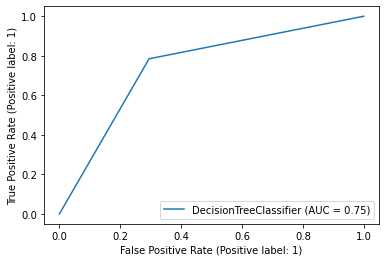

In [24]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve
plot_roc_curve(model, X_test,y_test)

Method 2: Oversample

In [25]:
count_class_0, count_class_1

(5192, 1271)

In [26]:
data_class_1_over = data_class_1.sample(count_class_0, replace=True)

data_class_over = pd.concat([data_class_1_over, data_class_0],axis=0)

In [27]:
X = data_class_over.drop('Target', axis=1)
y = data_class_over['Target']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8307, 12)
(2077, 12)
(8307,)
(2077,)


In [28]:
data_class_over.describe()

,ComponentAge,MonthlyRunTime,FlowRate,MaxOutputRate,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor5.1,DaysSinceMaintenance,Target,Location A
count,10384.000000,10384.000000,10384.000000,10384.000000,10384.000000,10384.000000,10384.000000,10384.000000,10384.000000,10384.000000,10384.000000,10384.000000,10384.000000
mean,0.535949,10.842785,0.994094,113.233677,7.180980,5.249730,0.320091,3.222053,0.324348,0.051681,30.564811,0.500000,0.781780
std,0.153648,1.287144,0.003114,53.237604,1.318033,4.542709,0.149116,0.160431,0.133100,0.030684,16.755282,0.500024,0.413058
min,0.220000,8.000000,0.987110,6.000000,3.800000,0.600000,0.080000,2.720000,0.000000,0.009000,1.000000,0.000000,0.000000
25%,0.430000,9.700000,0.991580,82.000000,6.400000,1.800000,0.220000,3.110000,0.260000,0.035000,18.000000,0.000000,1.000000
50%,0.510000,10.800000,0.993900,116.000000,6.900000,3.000000,0.280000,3.210000,0.310000,0.044000,29.000000,0.500000,1.000000
75%,0.620000,11.900000,0.996560,149.000000,7.600000,7.700000,0.380000,3.330000,0.390000,0.058000,41.000000,1.000000,1.000000
max,2.000000,14.900000,1.038980,440.000000,15.900000,65.800000,1.580000,4.010000,1.660000,0.611000,289.000000,1.000000,1.000000


In [29]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
base_preds = model.predict(X_test)
from sklearn.metrics import classification_report,plot_confusion_matrix
print(classification_report(y_test,base_preds))
# get predicted prices on validation data using training data
print(mean_absolute_error(y_test, base_preds))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      1010
           1       0.91      0.98      0.94      1067

    accuracy                           0.94      2077
   macro avg       0.94      0.94      0.94      2077
weighted avg       0.94      0.94      0.94      2077

0.05970149253731343


In [30]:
#Calculate Feature Importance
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance']).sort_values('Feature Importance',ascending=False)

,Feature Importance
MonthlyRunTime,0.274446
Sensor3,0.115284
Sensor2,0.085893
DaysSinceMaintenance,0.080450
MaxOutputRate,0.077889
Sensor5,0.070330
Sensor5.1,0.065020
ComponentAge,0.063862
Sensor4,0.058840
FlowRate,0.054297


C:\Users\olowe_m\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


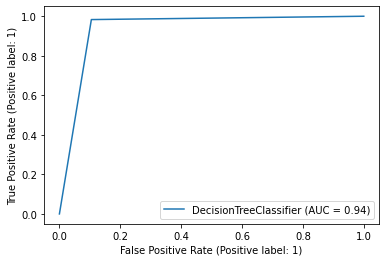

In [31]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve
plot_roc_curve(model, X_test,y_test)

method3: SMOTE

In [32]:
X = data.drop('Target', axis=1)
y = data['Target']

In [33]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy = 'minority')
X_sm, y_sm = smote.fit_resample(X,y)

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8307, 12)
(2077, 12)
(8307,)
(2077,)


In [35]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
base_preds = model.predict(X_test)
from sklearn.metrics import classification_report,plot_confusion_matrix
print(classification_report(y_test,base_preds))
# get predicted prices on validation data using training data
print(mean_absolute_error(y_test, base_preds))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1046
           1       0.86      0.85      0.86      1031

    accuracy                           0.86      2077
   macro avg       0.86      0.86      0.86      2077
weighted avg       0.86      0.86      0.86      2077

0.14347616754935003


In [36]:
#Calculate Feature Importance
pd.DataFrame(index=X_sm.columns,data=model.feature_importances_,columns=['Feature Importance']).sort_values('Feature Importance',ascending=False)

,Feature Importance
MonthlyRunTime,0.312132
Sensor3,0.121033
Sensor2,0.077593
Sensor1,0.071319
ComponentAge,0.069299
DaysSinceMaintenance,0.067593
MaxOutputRate,0.065415
Sensor4,0.062777
Sensor5.1,0.053360
FlowRate,0.050687


C:\Users\olowe_m\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


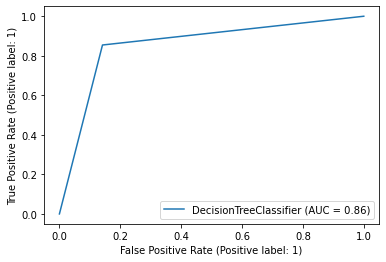

In [37]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve
plot_roc_curve(model, X_test,y_test)